# Naive Bayes

In [10]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [29]:
df = sns.load_dataset('titanic')

In [30]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [32]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [33]:
df['age'].fillna(df['age'].median(), inplace=True)

C:\Users\sushi\AppData\Local\Temp\ipykernel_8628\1654433547.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)


In [34]:
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

C:\Users\sushi\AppData\Local\Temp\ipykernel_8628\1964997694.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)


In [40]:
if 'Unknown' not in df['deck'].cat.categories:
    df['deck'] = df['deck'].cat.add_categories('Unknown')

In [42]:
df['deck'].fillna('Unknown', inplace=True)

In [44]:
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)

C:\Users\sushi\AppData\Local\Temp\ipykernel_8628\395761809.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)


In [45]:
df.isna().sum().sum()

np.int64(0)

Drop the columns that are not useful for NB

In [46]:
df.drop(columns=['alive','class', 'who', 'adult_male', 'embark_town', 'alone'], inplace=True)

In [48]:
label_encoder={}

In [49]:
for col in ['sex', 'embarked', 'deck']:
    le=LabelEncoder()
    df[col]=le.fit_transform(df[col])
    label_encoder[col] = le

In [53]:
X = df.drop('survived', axis=1)
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

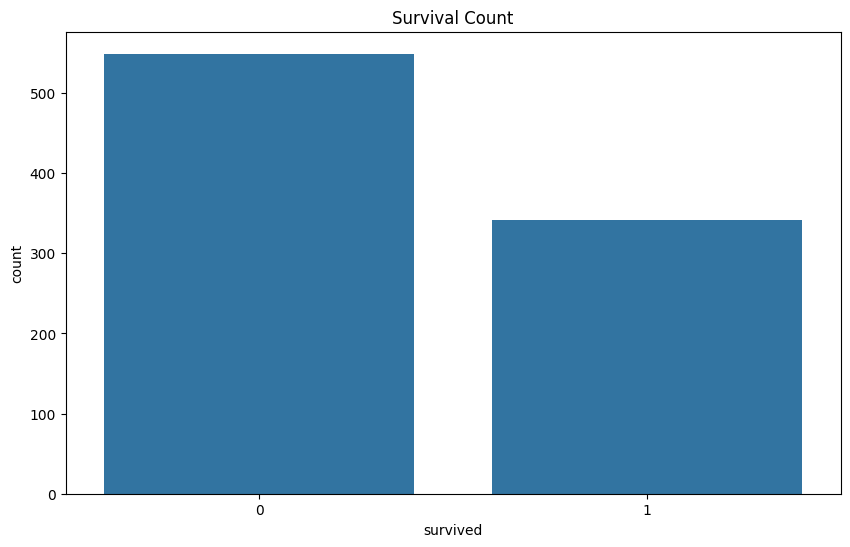

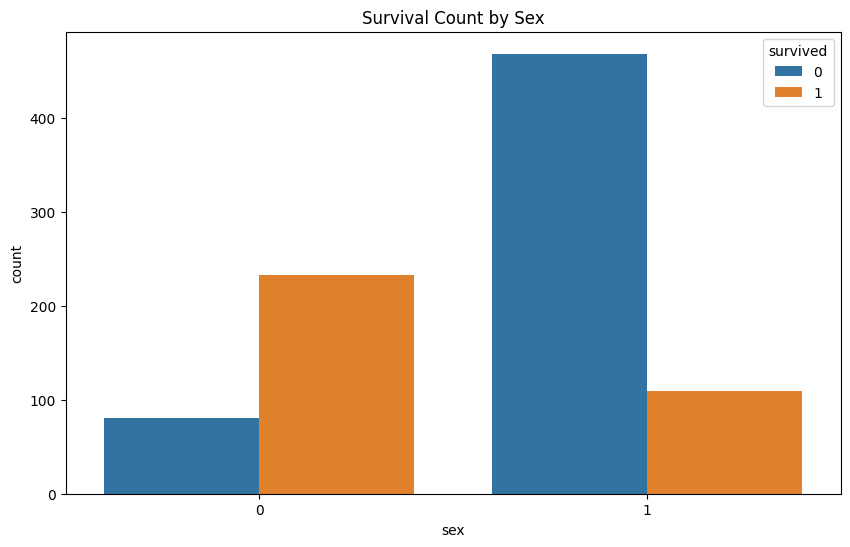

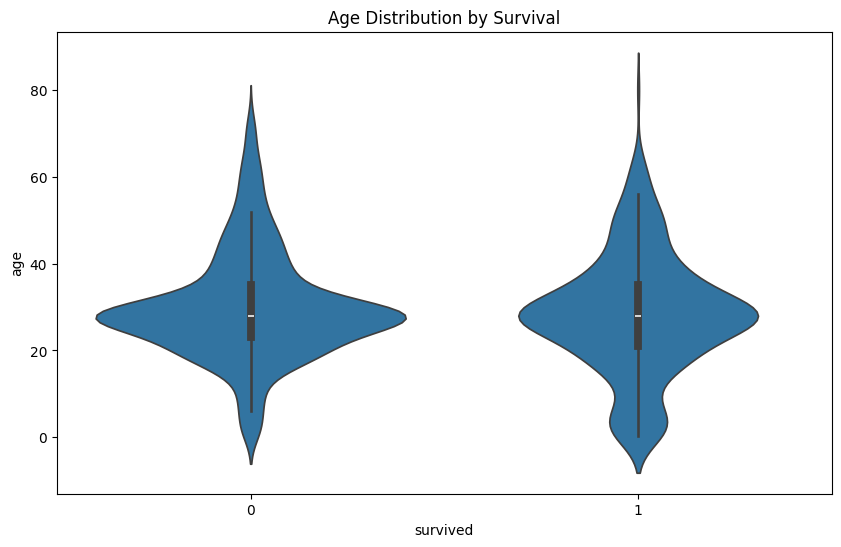

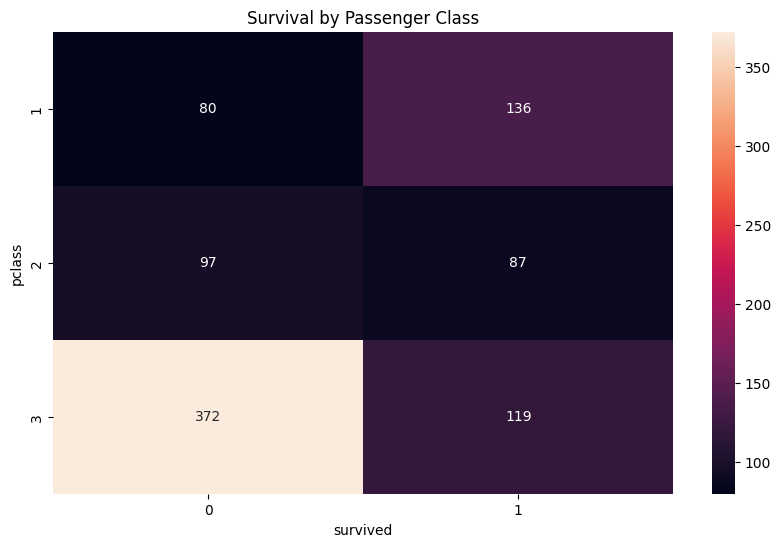

In [55]:
# Survival count
plt.figure(figsize=(10,6))
sns.countplot(x='survived', data=df)
plt.title('Survival Count')
plt.show()

# Survival by sex
plt.figure(figsize=(10,6))
sns.countplot(x='sex', hue='survived', data=df)
plt.title('Survival Count by Sex')
plt.show()

# Age distribution by survival
plt.figure(figsize=(10,6))
sns.violinplot(x='survived', y='age', data=df)
plt.title('Age Distribution by Survival')
plt.show()

# Survival by passenger class
plt.figure(figsize=(10,6))
sns.heatmap(pd.crosstab(df['pclass'], df['survived']), annot=True, fmt='d')
plt.title('Survival by Passenger Class')
plt.show()


In [56]:
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict on test set
y_pred = nb.predict(X_test)


Accuracy: 0.7933
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       105
           1       0.74      0.77      0.75        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179



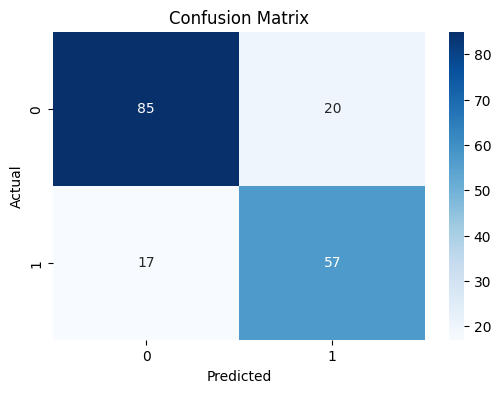

In [57]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
